In [310]:
# Import packages
import pandas as pd
import numpy as np
import pickle

# Import Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad
from keras.regularizers import l1, l2

# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format="retina"

```python
### DO NOT RUN - SAMPLE CODE ONLY
model = Sequential()
model.add(Dense(1, input_dim=len(X[0, :]), activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])```

```python
### DO NOT RUN - SAMPLE CODE ONLY
model.fit(x=X, y=Y, epoch=100, verbose=1)```

### Full dataset

In [380]:
# Load cleaned openfoodfact dataset
with open("full_data_nutri.pkl", "rb") as f:
    full = pickle.load(f)
f.close()

# Load additive feature dataset with reduced dimensions
with open("additive_feature.pkl", "rb") as f:
    x_additive = pickle.load(f)
f.close()

In [382]:
# Prepare dataset for model training
train = full.iloc[:, 15:]
train = train.drop(["pnns_groups_1", "pnns_groups_2", "nutrient_levels_tags", "main_category_en", "energy-kj_100g", "energy-kcal_100g", "main_category",
                    "nutrition-score-fr_100g", "nutrition-score-uk_100g"], axis=1)
cols = train.columns[3:].values

# Convert to numerical format and scale them
for col in cols:
    train[col] = pd.to_numeric(train[col], errors="coerce")
    train[col].fillna(0, inplace=True)

# Reset index
train.reset_index(drop=True, inplace=True)

In [383]:
# Append both dataframes into one for training
train = train.join(x_additive)

In [384]:
# Setup the dataset for training
target = train["nova_group"]
train_nova = train.drop("nova_group", axis=1)

In [385]:
# Encode nutriscore_grade into numeric index
label_encoder = LabelEncoder()
train_nova["nutriscore_grade_encoded"] = label_encoder.fit_transform(train_nova["nutriscore_grade"])
train_nova.drop("nutriscore_grade", axis=1, inplace=True)

# Fill nans with 0s
train_nova.fillna(0, inplace=True)
train_nova = np.array(train_nova)

/var/folders/9r/rp1x66b10117hbqpszsm6xhw0000gn/T/ipykernel_2018/890712444.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_nova["nutriscore_grade_encoded"] = label_encoder.fit_transform(train_nova["nutriscore_grade"])


In [386]:
# Convert datasets to numpy arrays
train_nova = np.asarray(train_nova).astype("float32")
target = np.asarray(target).astype("float32") - 1

In [387]:
# Prepare train test dataset
x_train, x_test, y_train, y_test = train_test_split(train_nova, target, test_size=0.2, random_state=42)

### Logistic regression with SGD optimizer

In [400]:
# Define the logistic regression model
dim=x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax"))

In [401]:
# Compile model
opt = SGD(learning_rate=0.001, momentum=0.005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [402]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [403]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

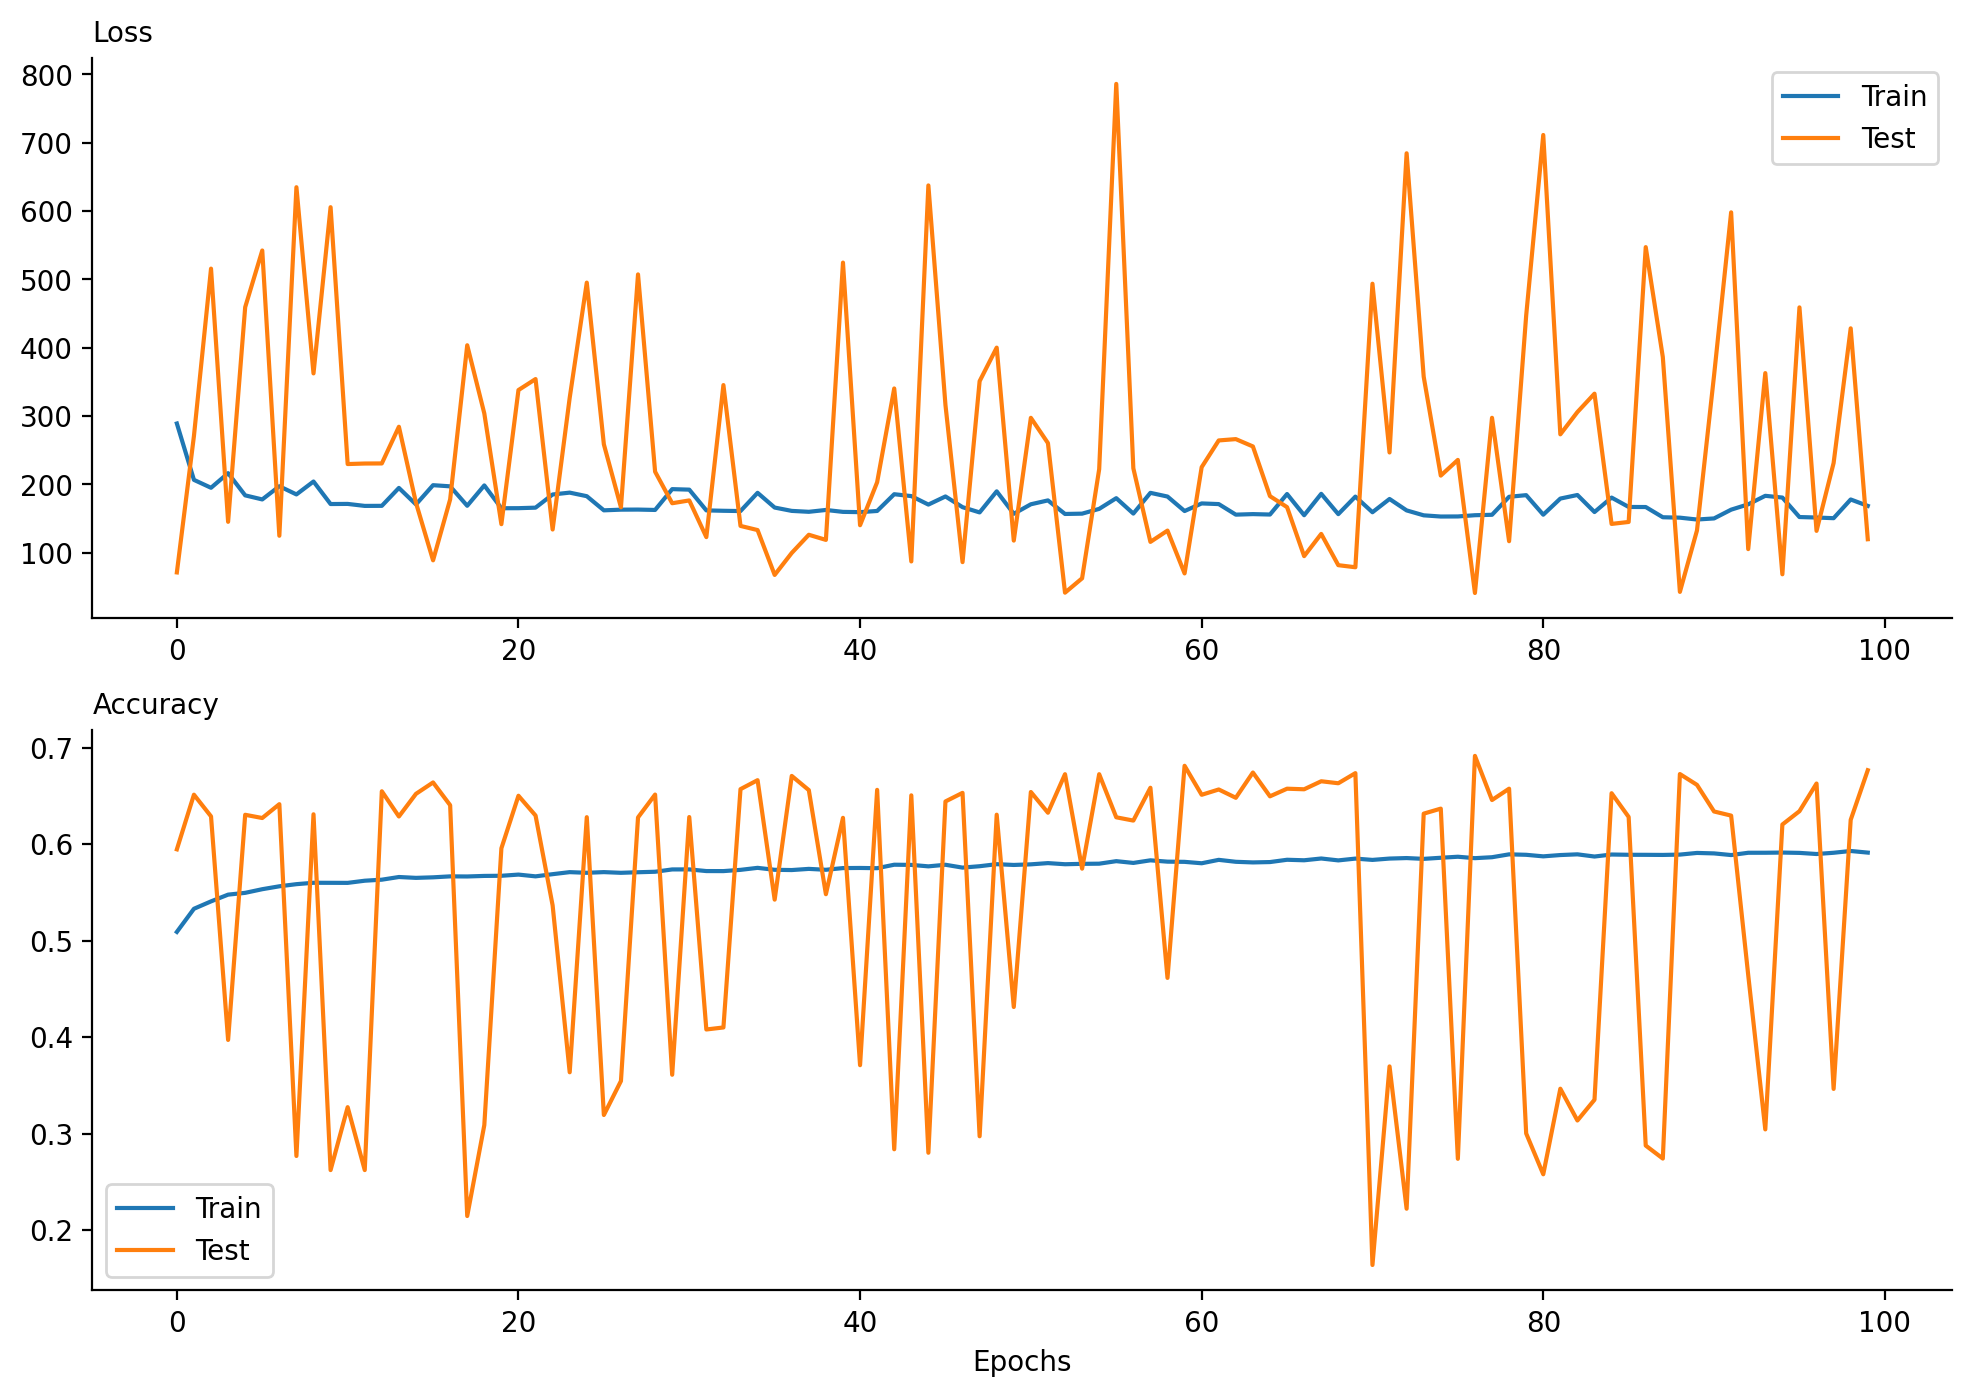

In [407]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [405]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 67.7722%; Test accuracy: 67.6571%


### Logistic regression with Adam optimizer

In [408]:
# Define the logistic regression model
dim=x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax"))

In [409]:
# Compile model
opt = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [410]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [411]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

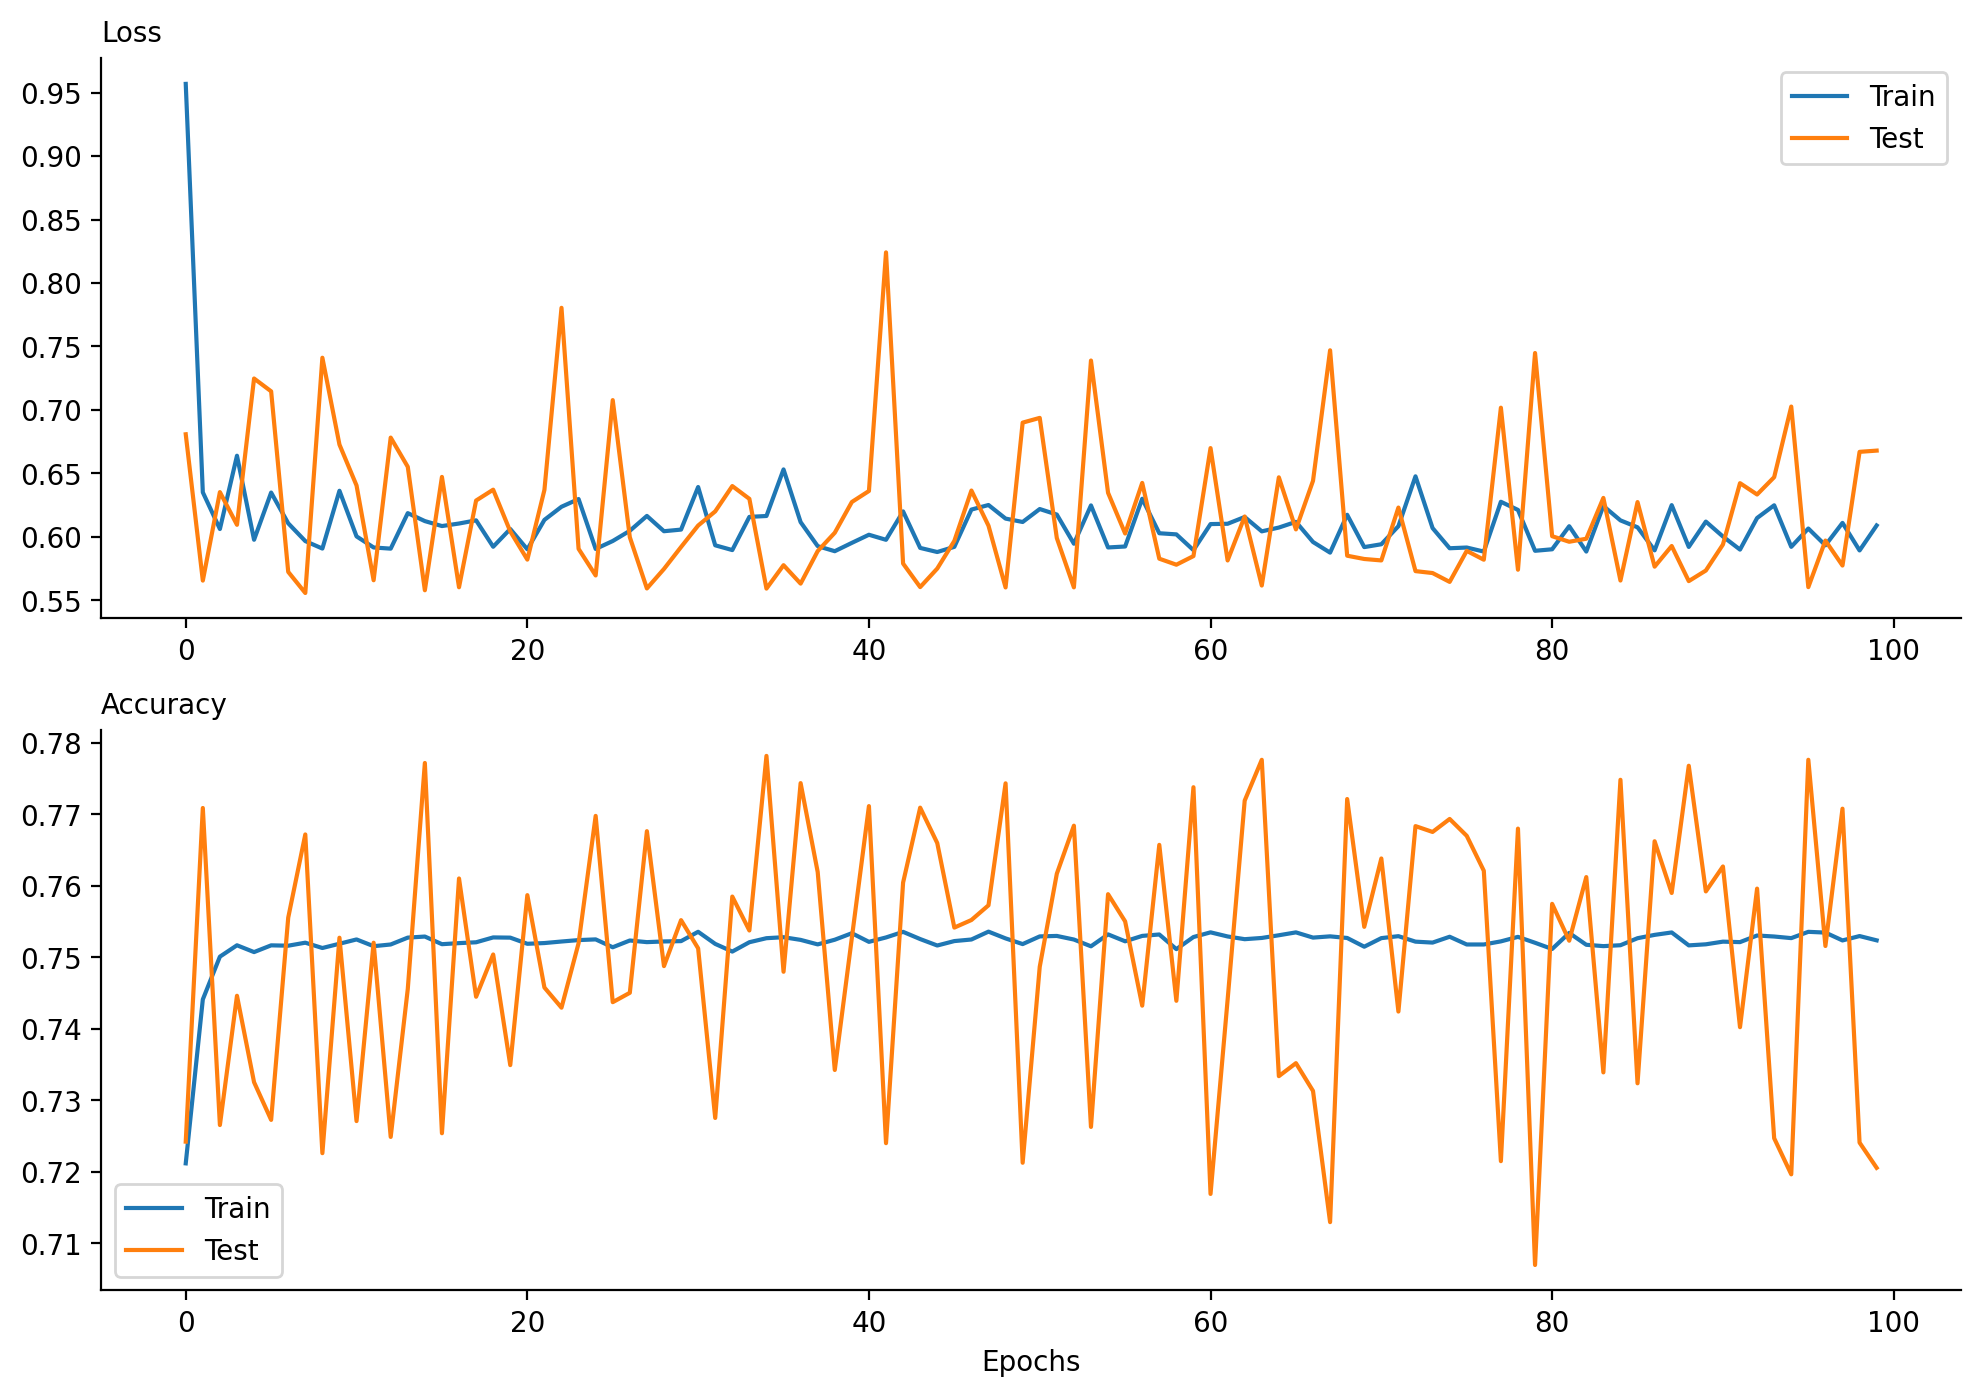

In [412]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [399]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 73.3436%; Test accuracy: 73.3222%


### Logistic regression with Adagrad optimizer

In [337]:
# Define the logistic regression model
dim = x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax"))

In [338]:
# Compile model
opt = Adagrad(learning_rate=0.001, initial_accumulator_value=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [339]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [340]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

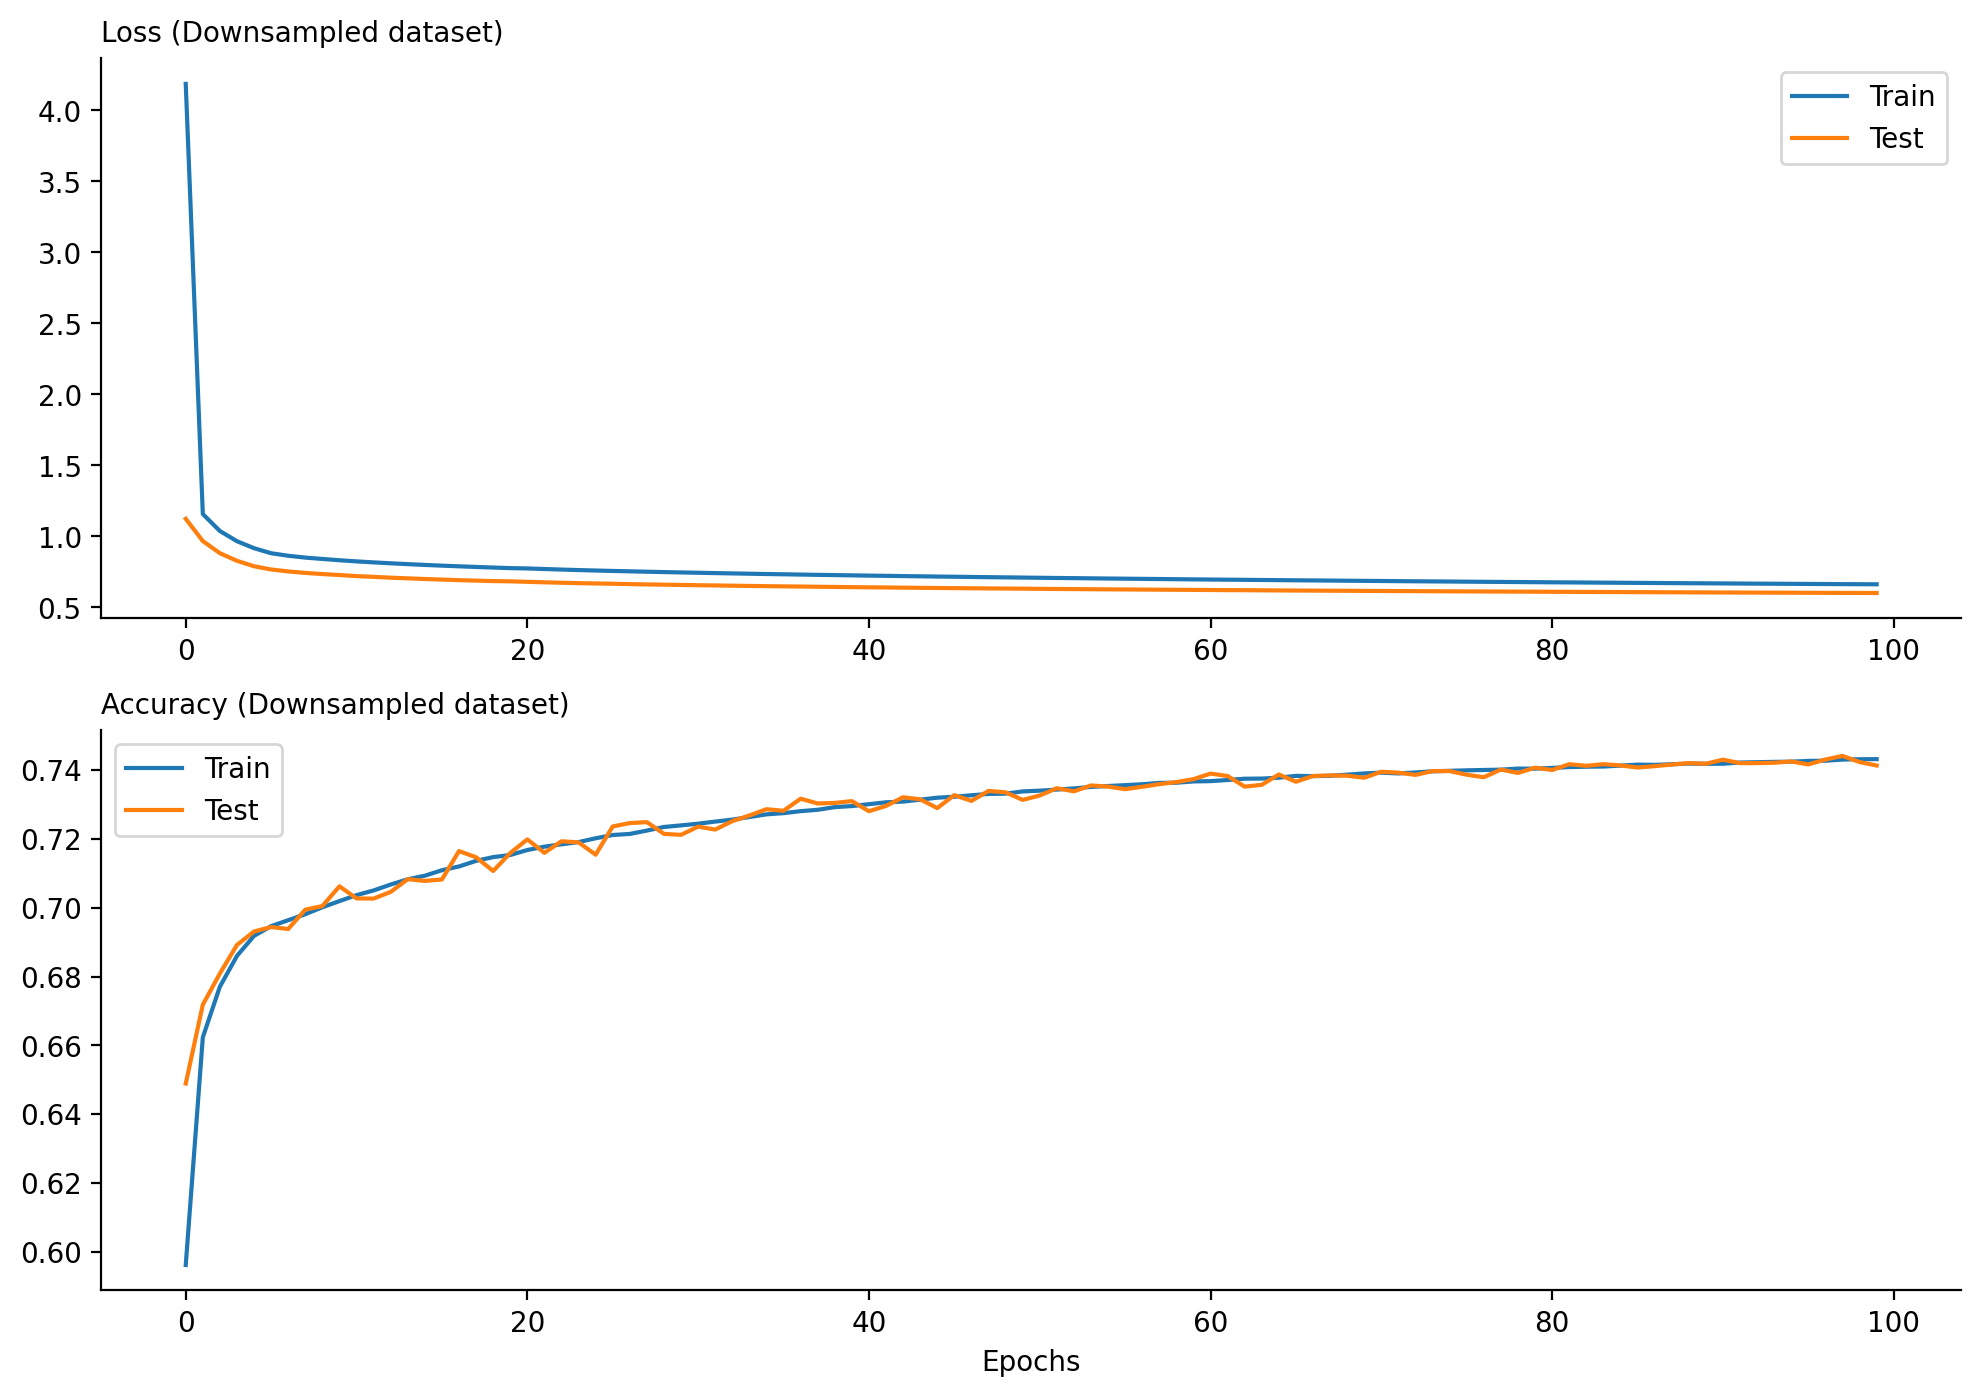

In [341]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss (Downsampled dataset)", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy (Downsampled dataset)", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [342]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 74.1097%; Test accuracy: 74.1323%


### Logistic regression with Adagrad optimizer and L2 regularization

In [343]:
# Define the logistic regression model
dim = x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax", kernel_regularizer=l2(0.01)))

In [344]:
# Compile model
opt = Adagrad(learning_rate=0.01, initial_accumulator_value=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [345]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [346]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

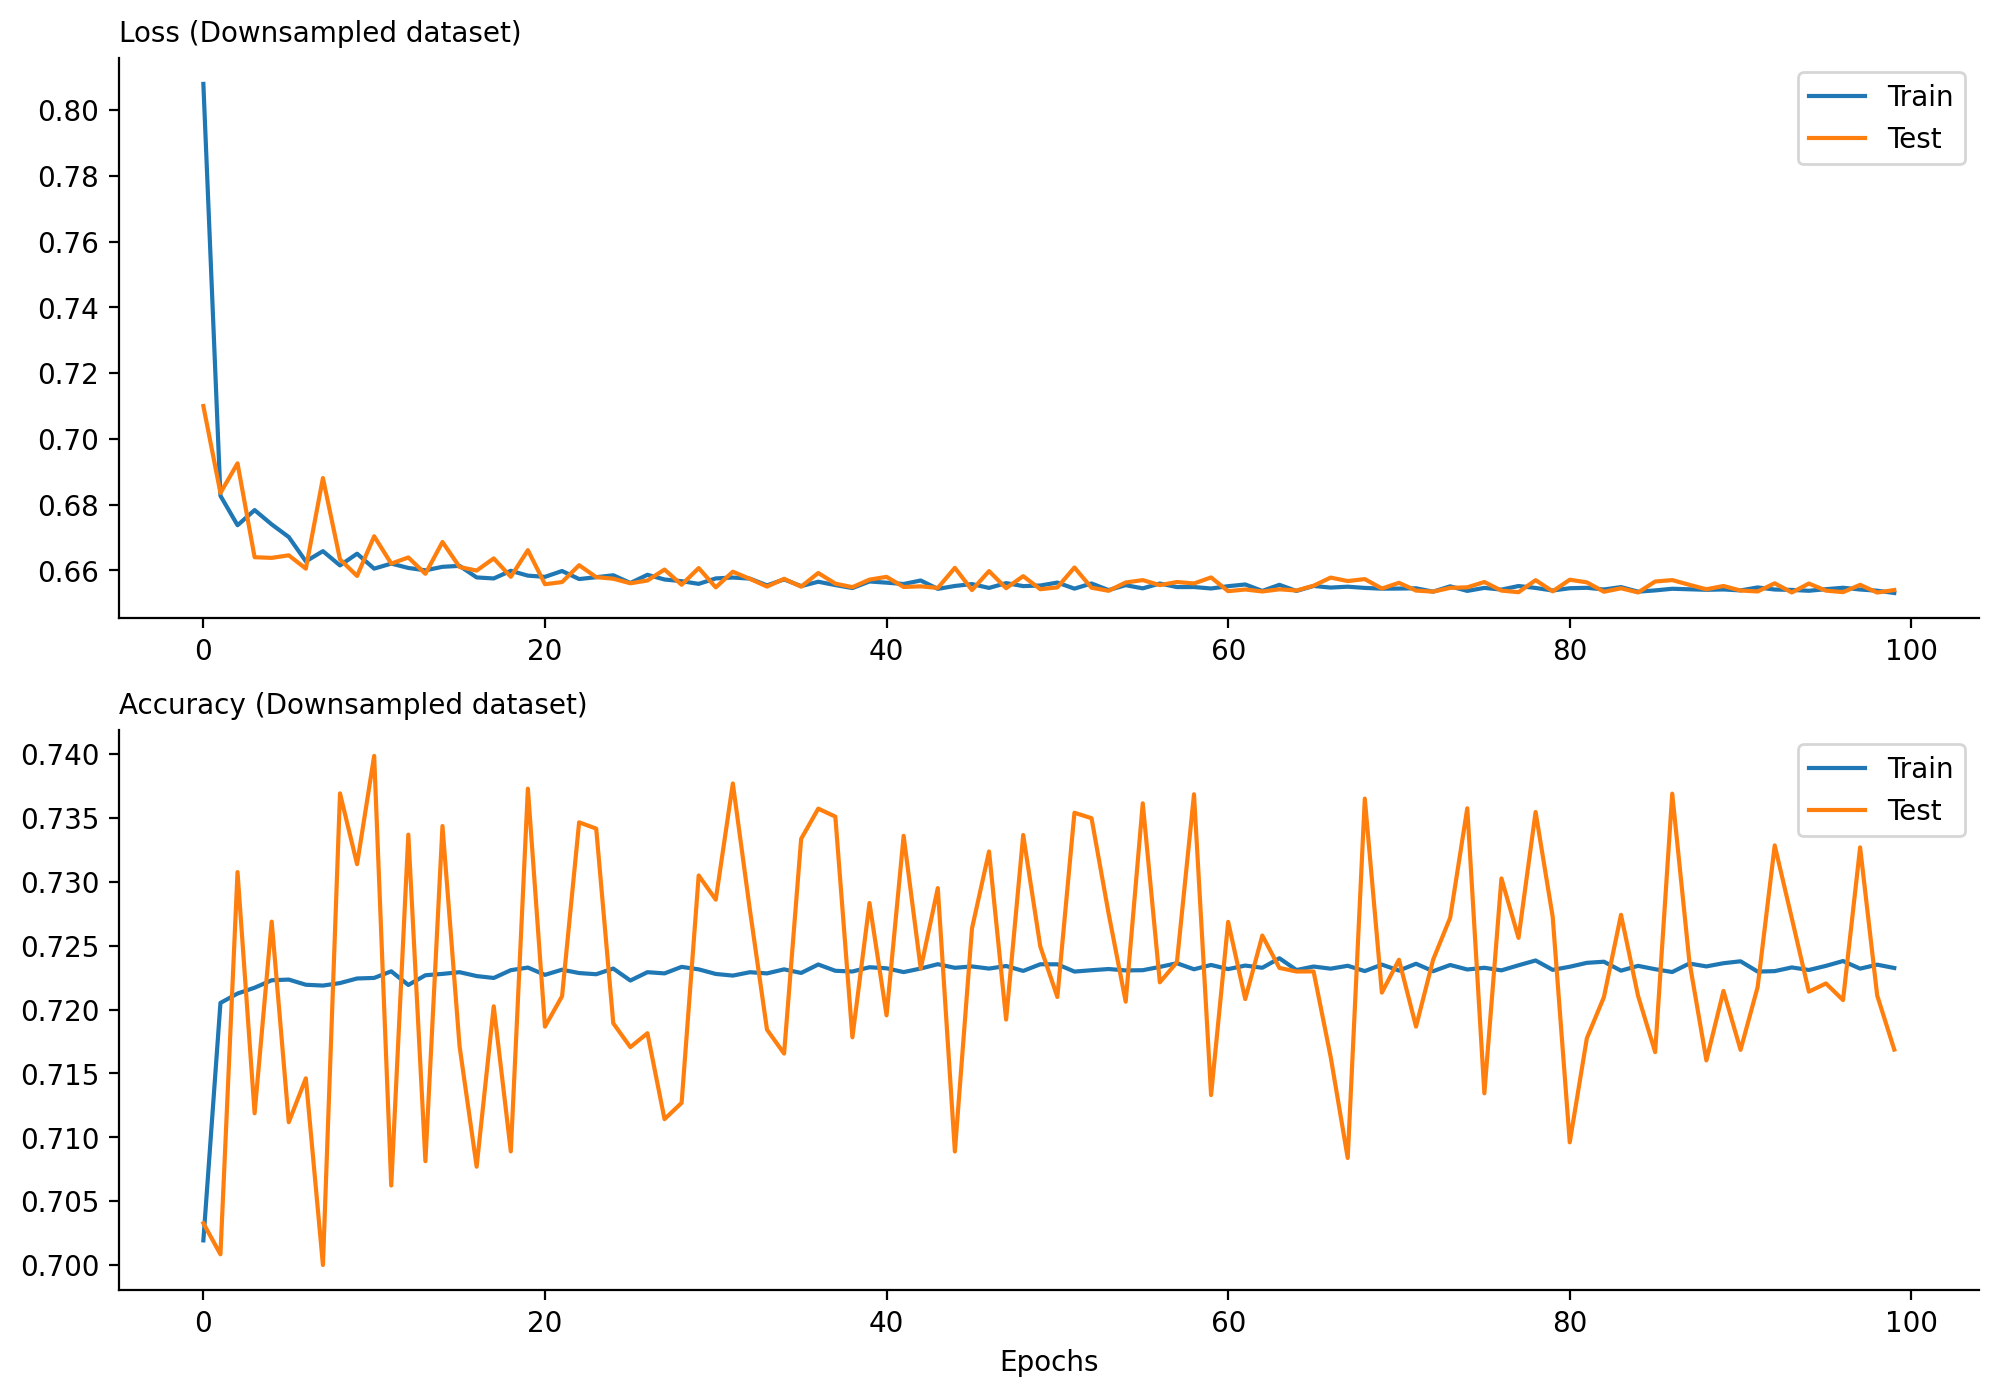

In [347]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss (Downsampled dataset)", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy (Downsampled dataset)", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [348]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 71.7085%; Test accuracy: 71.6864%


### Downsampled dataset version

In [349]:
# Load cleaned openfoodfact dataset
with open("downsample_data_nutri.pkl", "rb") as f:
    down = pickle.load(f)
f.close()

# Load additive feature dataset with reduced dimensions
with open("downsample_additive_feature.pkl", "rb") as f:
    x_down_additive = pickle.load(f)
f.close()

In [350]:
# Prepare dataset for model training
train = down.iloc[:, 15:]
train = train.drop(["pnns_groups_1", "pnns_groups_2", "nutrient_levels_tags", "main_category_en", "energy-kj_100g", "energy-kcal_100g", "main_category",
                    "nutrition-score-fr_100g", "nutrition-score-uk_100g"], axis=1)
cols = train.columns[3:].values

# Convert to numerical format and scale them
for col in cols:
    train[col] = pd.to_numeric(train[col], errors="coerce")
    train[col].fillna(0, inplace=True)

# Reset index
train.reset_index(drop=True, inplace=True)

In [351]:
# Append both dataframes into one for training
train = train.join(x_down_additive)

In [352]:
# Setup the dataset for training
target = train["nova_group"]
train_nova = train.drop("nova_group", axis=1)

In [353]:
# Encode nutriscore_grade into numeric index
label_encoder = LabelEncoder()
train_nova["nutriscore_grade_encoded"] = label_encoder.fit_transform(train_nova["nutriscore_grade"])
train_nova.drop("nutriscore_grade", axis=1, inplace=True)

# Fill nans with 0s
train_nova.fillna(0, inplace=True)
train_nova = np.array(train_nova)

/var/folders/9r/rp1x66b10117hbqpszsm6xhw0000gn/T/ipykernel_2018/890712444.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_nova["nutriscore_grade_encoded"] = label_encoder.fit_transform(train_nova["nutriscore_grade"])


In [354]:
# Convert datasets to numpy arrays
train_nova = np.asarray(train_nova).astype("float32")
target = np.asarray(target).astype("float32") - 1

In [355]:
# Prepare train test dataset
x_train, x_test, y_train, y_test = train_test_split(train_nova, target, test_size=0.2, random_state=42)

### Logistic regression with SGD optimizer

In [356]:
# Define the logistic regression model
dim=x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax"))

In [357]:
# Compile model
opt = SGD(learning_rate=0.001, momentum=0.005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [358]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [359]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

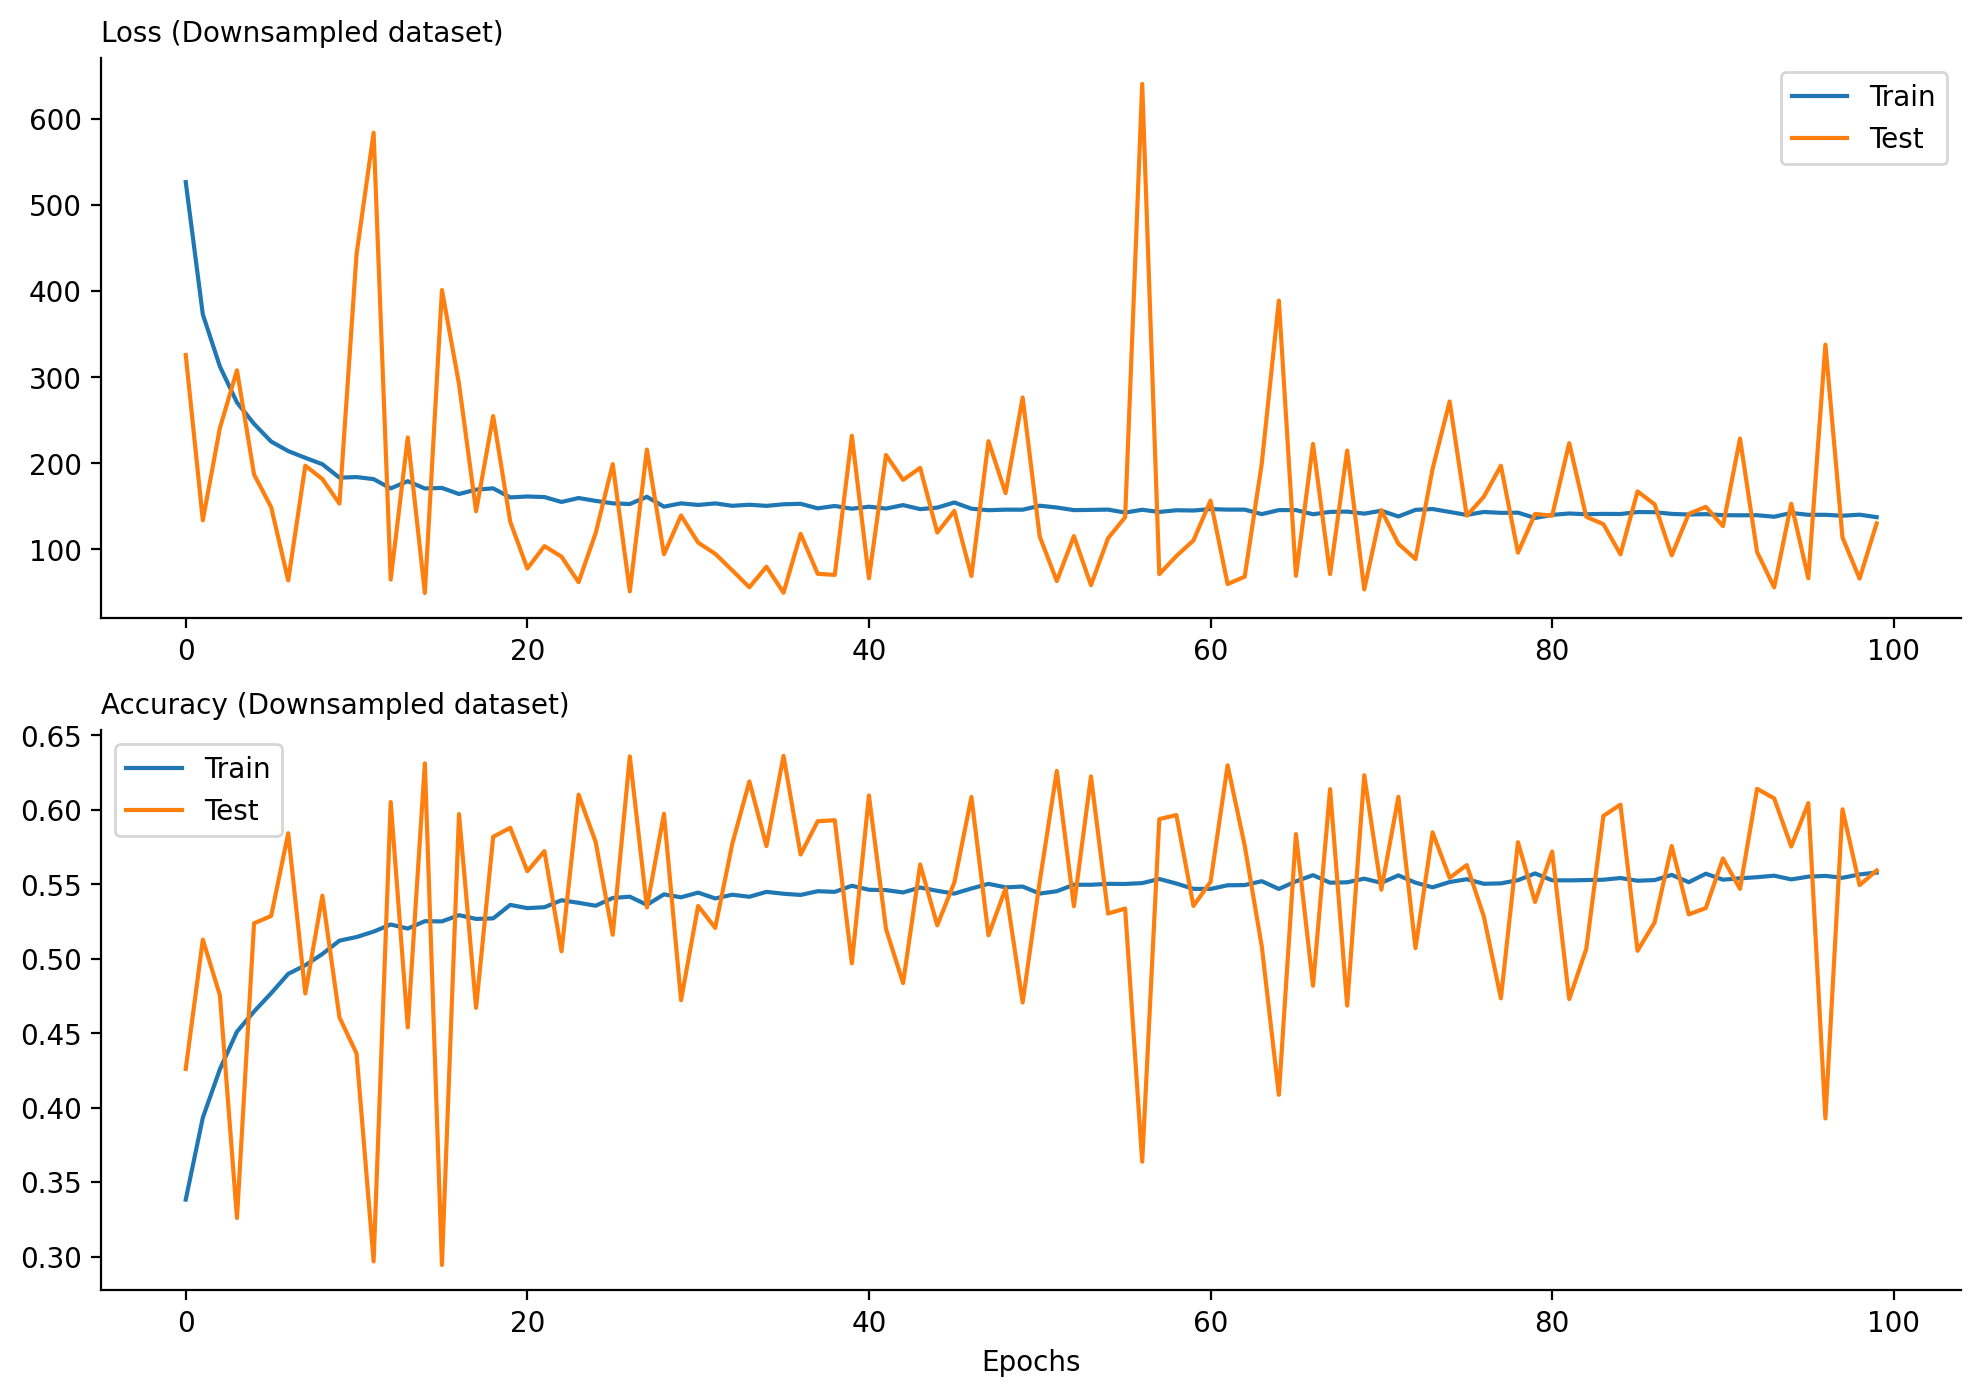

In [360]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss (Downsampled dataset)", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy (Downsampled dataset)", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [361]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 55.6037%; Test accuracy: 55.9318%


### Logistic regression with Adam optimizer

In [362]:
# Define the logistic regression model
dim=x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax"))

In [363]:
# Compile model
opt = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [364]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [365]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

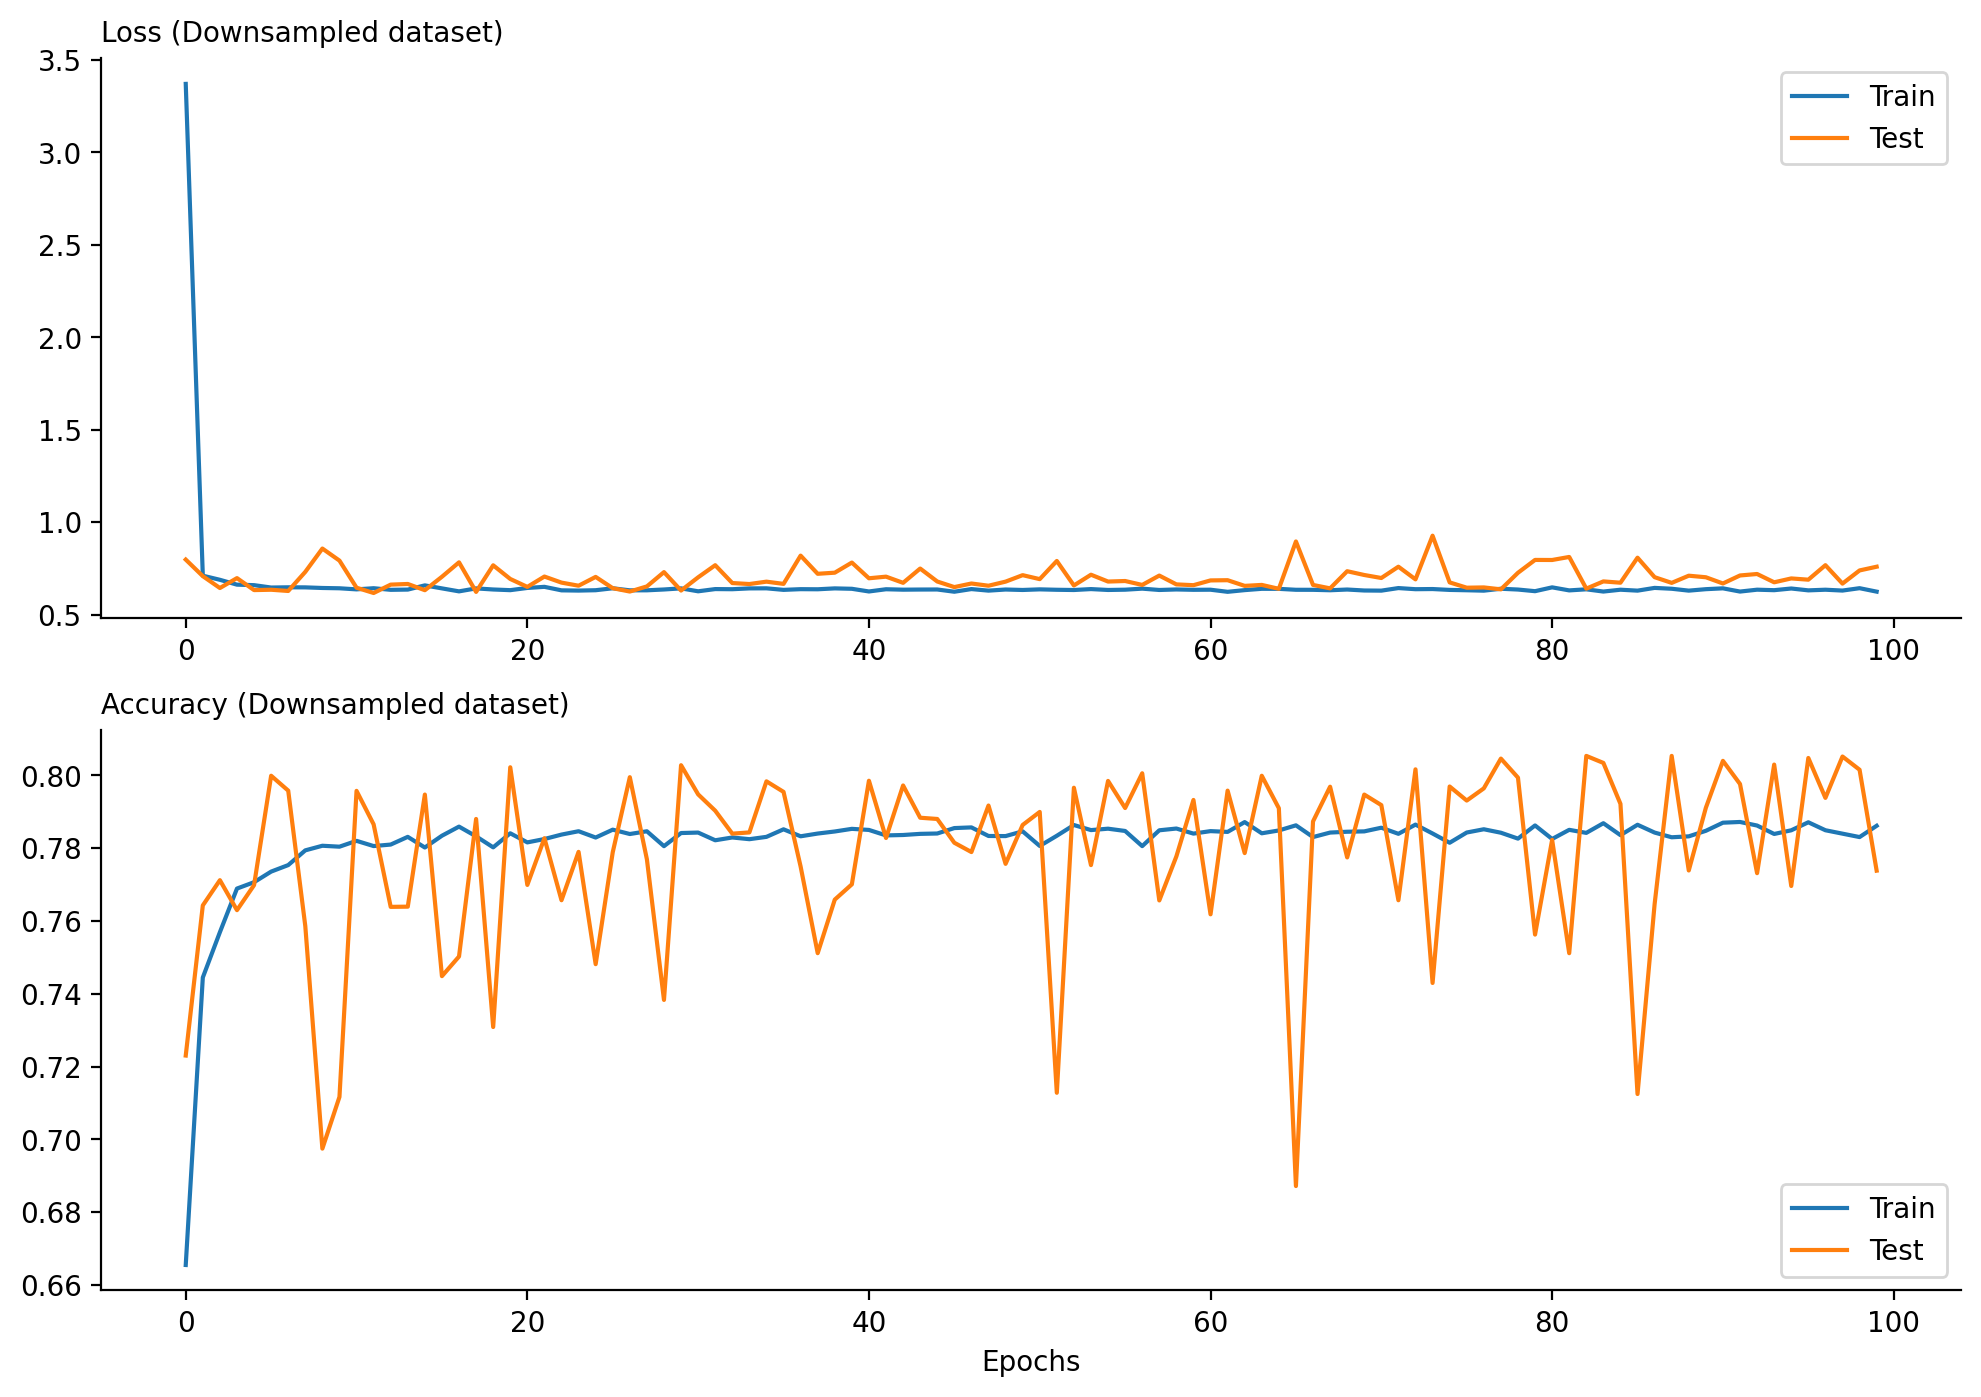

In [366]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss (Downsampled dataset)", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy (Downsampled dataset)", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [367]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 77.4119%; Test accuracy: 77.3807%


### Logistic regression with Adagrad optimizer

In [368]:
# Define the logistic regression model
dim = x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax"))

In [369]:
# Compile model
opt = Adagrad(learning_rate=0.001, initial_accumulator_value=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [370]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [371]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

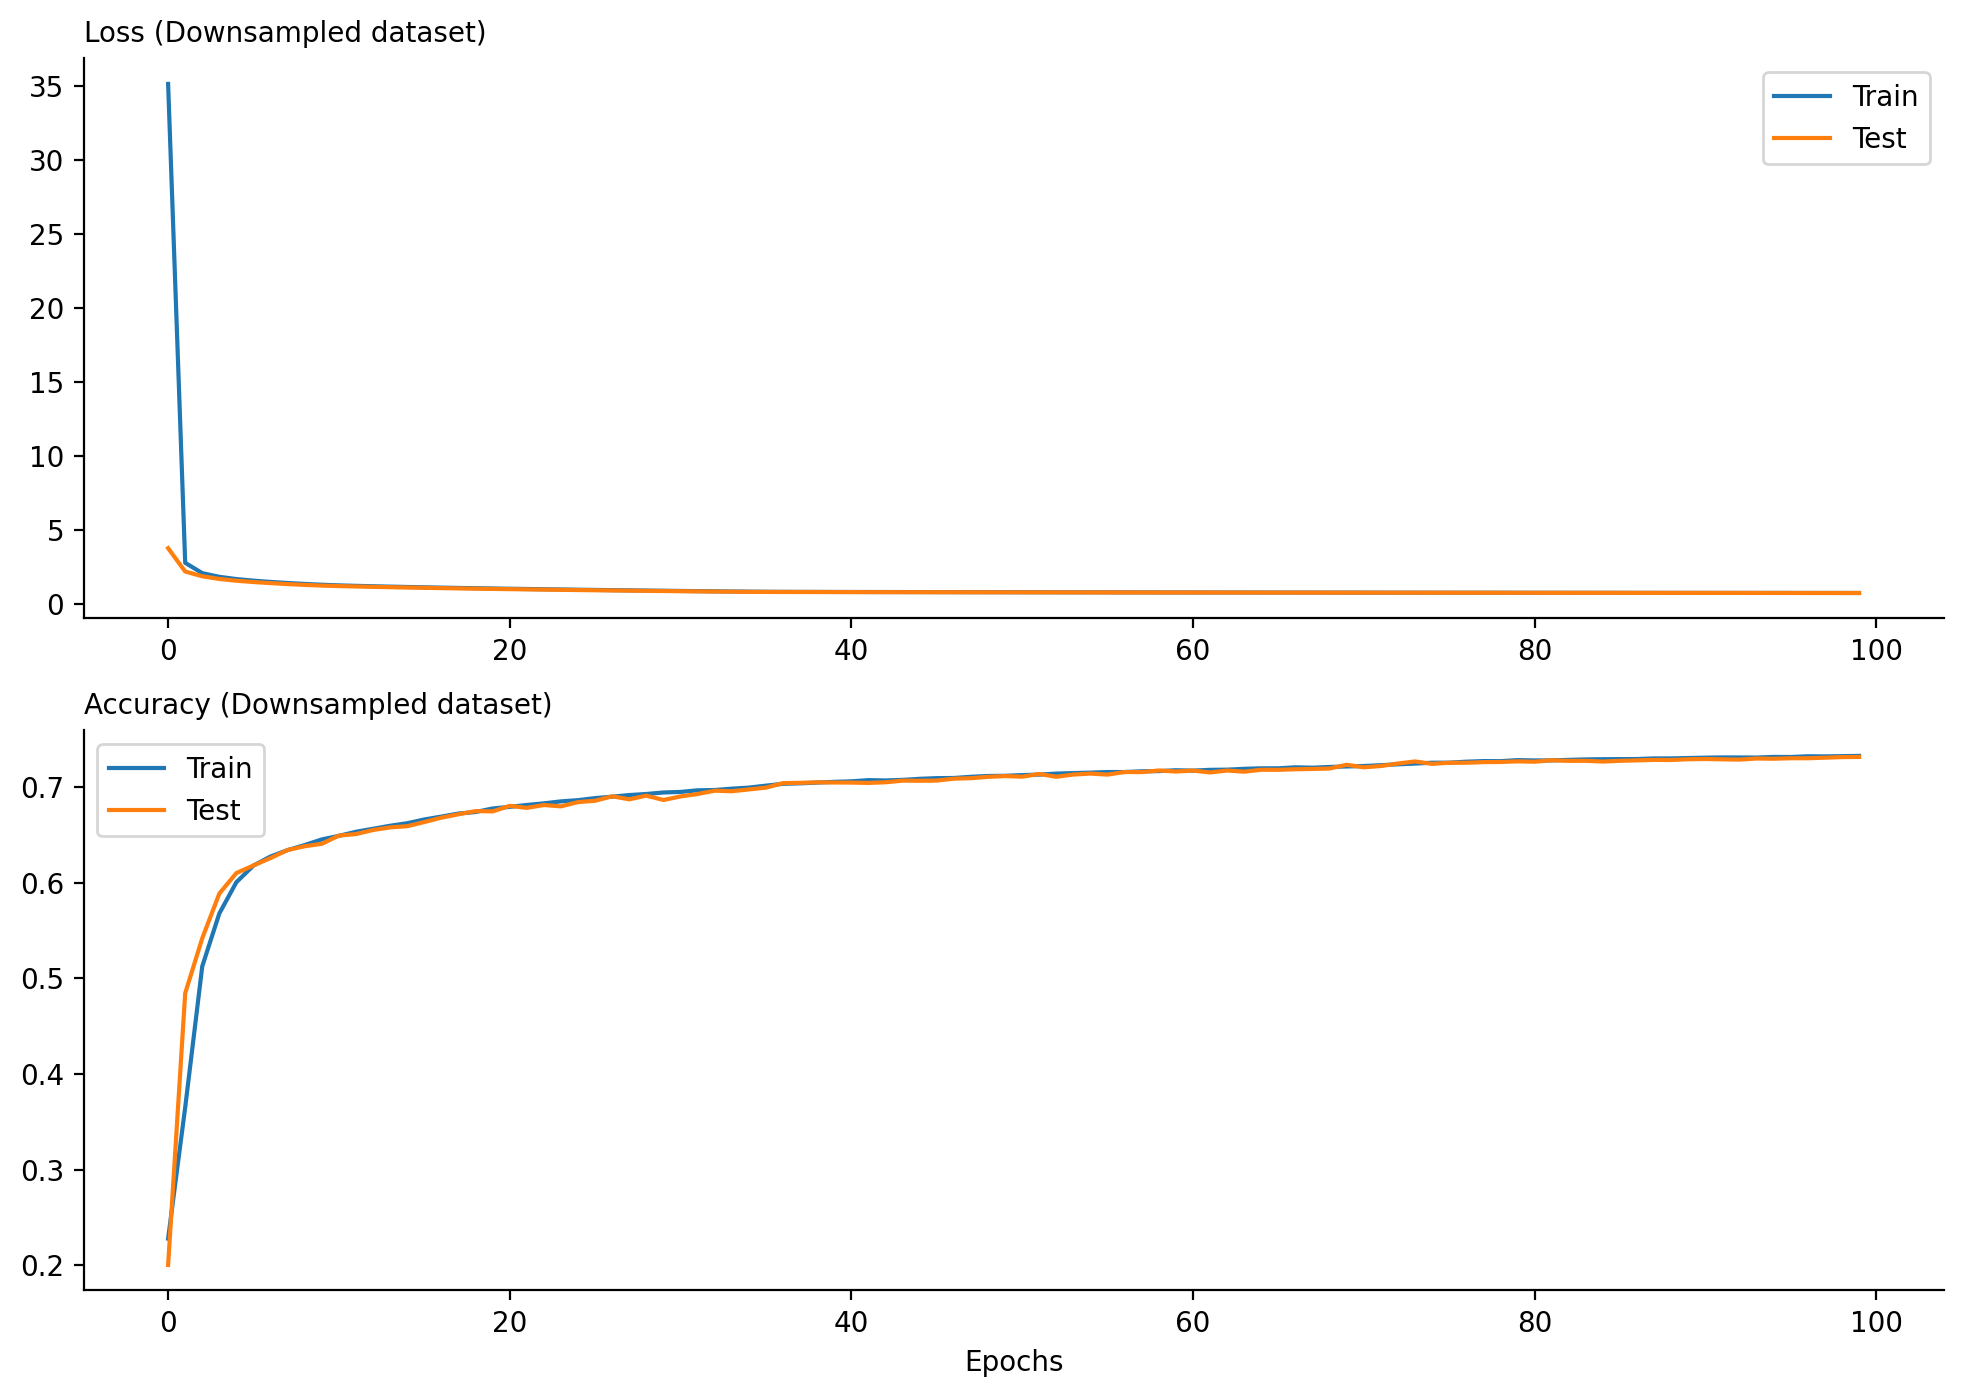

In [372]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss (Downsampled dataset)", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy (Downsampled dataset)", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [373]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 73.3224%; Test accuracy: 73.1364%


### Logistic regression with Adagrad optimizer and L2 regularization

In [374]:
# Define the logistic regression model
dim = x_train.shape[1]
model = Sequential()
model.add(Dense(4, input_dim=dim, activation="softmax", kernel_regularizer=l2(0.01)))

In [375]:
# Compile model
opt = Adagrad(learning_rate=0.01, initial_accumulator_value=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [376]:
# Fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

In [377]:
# Evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

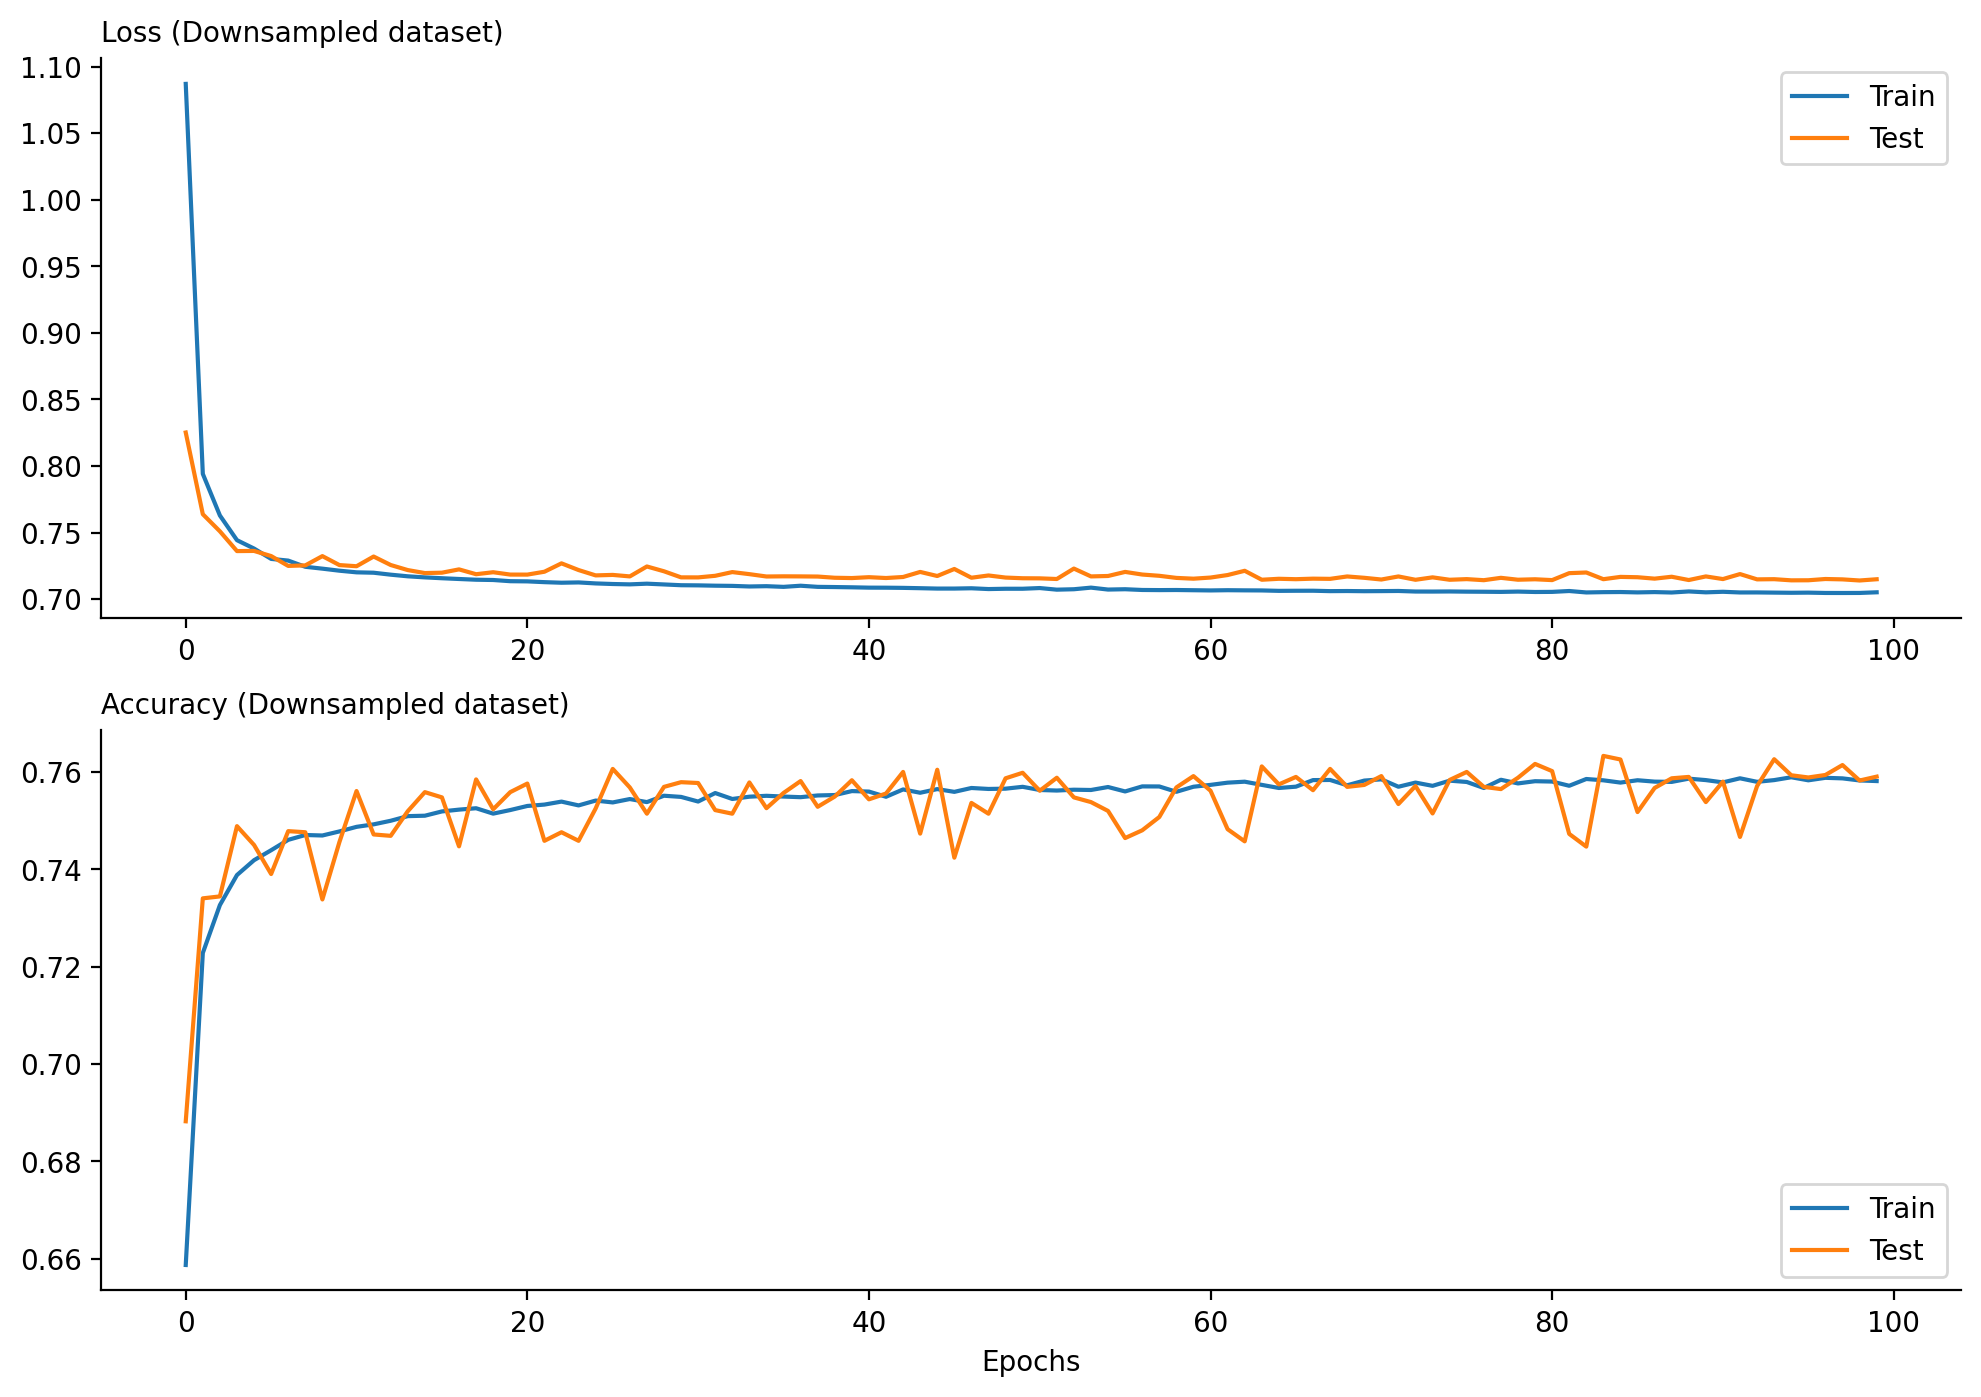

In [378]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss (Downsampled dataset)", loc="left", fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.subplot(212)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy (Downsampled dataset)", loc="left", fontsize=10)
plt.xlabel("Epochs")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend()
plt.show()

In [379]:
print(f"Train accuracy: {train_acc:.4%}; Test accuracy: {test_acc:.4%}")

Train accuracy: 75.8835%; Test accuracy: 75.9034%
